<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn

In [5]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv')

In [6]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv.

In [7]:
# Приведём данные к нормальному виду
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

In [9]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Присланные данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. В данных 22 столбца, разное количество строк, разный формат, пропущенные значения. В названии столбца cityCenters_nearest строчные буквы сочетаются с прописными. Время публикации объявления можно преобразовать в подходящий формат.<br>
Столбцы:<br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
balcony — число балконов<br>
ceiling_height — высота потолков (м)<br>
cityCenters_nearest — расстояние до центра города (м)<br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
first_day_exposition — дата публикации<br>
floor — этаж<br>
floors_total — всего этажей в доме<br>
is_apartment — апартаменты (булев тип)<br>
kitchen_area — площадь кухни в квадратных метрах (м²)<br>
last_price — цена на момент снятия с публикации<br>
living_area — жилая площадь в квадратных метрах (м²)<br>
locality_name — название населённого пункта<br>
open_plan — свободная планировка (булев тип)<br>
parks_around3000 — число парков в радиусе 3 км<br>
parks_nearest — расстояние до ближайшего парка (м)<br>
ponds_around3000 — число водоёмов в радиусе 3 км<br>
ponds_nearest — расстояние до ближайшего водоёма (м)<br>
rooms — число комнат<br>
studio — квартира-студия (булев тип)<br>
total_area — площадь квартиры в квадратных метрах (м²)<br>
total_images — число фотографий квартиры в объявлении<br>

Так как количество пропусков в столбцах разное, то, скорее всего, пропуски просто решили не указывать.
Так как по условию расстояние до центра, аэропорта, ближайшего парка и водоёма получены автоматически на основе картографических данных, то а количество пропусков в них примерно равно, то пропуски вызваны тем, что система не смогла определить их.<br>
Высота потолков, скорее всего, продавцы считают это малозначимой информацией
Количество этажей - всего 86 пропусков
Жил.площаль - эти пропуски нельзя ни убрать, ни заполнить, так как они имеют большое влияние на стоимость
Название населенного пункта - всего 49 пропусков </div>

## Предобработка данных

In [10]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

ceiling_height - высота потолков нет подходящей замены пропусков <br>
floors_total  - количество этажей нет подходящей замены пропусков <br>
living_area   - жил. площадь нет подходящей замены пропусков <br>
is_apartment  - нет подходящей замены пропусков <br>
kitchen_area  - площадь кухни нет подходящей замены пропусков <br>
locality_name  - название населенного пункта нет подходящей замены пропусков <br>
airports_nearest  - расстояние до ближайшего аэропорта нет подходящей замены пропусков <br>
cityCenters_nearest  - расстояние до центра города нет подходящей замены пропусков <br>
parks_around3000    - количество парков в радиусе 3 км нет подходящей замены пропусков <br>
parks_nearest     - парки рядом нет подходящей замены пропусков <br>
ponds_around3000    - водоемы в радиусе 3 км нет подходящей замены пропусков <br>
ponds_nearest       - ближайшие водоемы нет подходящей замены пропусков <br>
days_exposition     - длительность размещения объявления нет подходящей замены пропусков <br>

In [11]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми.

In [12]:
# Заполняем пропуски в столбце balcony
df['balcony'] = df['balcony'].fillna(0)

In [13]:
# подсчёт пропусков
df['balcony'].isna().sum()

0

In [14]:
#Переименуем стоблбец cityCenters_nearest
df = df.rename(columns={'cityCenters_nearest' : 'citycenters_nearest'})

In [15]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [16]:
# Проверка столбцов
for i in df:
    display(df[i].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
2874906.0       1
36001900.0      1
5812504.0       1
4479300.0       1
2235000.0       1
Name: last_price, Length: 2978, dtype: int64

45.0      419
42.0      383
60.0      347
31.0      346
44.0      345
         ... 
114.55      1
127.9       1
152.8       1
28.71       1
138.5       1
Name: total_area, Length: 2182, dtype: int64

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2017-01-28T00:00:00      1
2015-03-01T00:00:00      1
2016-10-30T00:00:00      1
2015-09-08T00:00:00      1
2016-09-12T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

2.5     3515
2.6     1646
2.7     1574
3.0     1112
2.8      993
        ... 
3.83       1
3.42       1
3.58       1
24.0       1
2.25       1
Name: ceiling_height, Length: 183, dtype: int64

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
33.0       1
60.0       1
37.0       1
29.0       1
34.0       1
52.0       1
Name: floors_total, dtype: int64

18.0     882
17.0     675
30.0     598
16.0     486
20.0     481
        ... 
100.7      1
89.3       1
124.9      1
77.4       1
50.25      1
Name: living_area, Length: 1782, dtype: int64

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64

False    23550
True       149
Name: studio, dtype: int64

False    23632
True        67
Name: open_plan, dtype: int64

6.0      1300
10.0     1262
8.0      1110
9.0      1101
7.0      1062
         ... 
2.89        1
16.05       1
32.9        1
6.03        1
8.77        1
Name: kitchen_area, Length: 971, dtype: int64

0      11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Санкт-Петербург                     15721
посёлок Мурино                        522
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
деревня Терпилицы                       1
садовое товарищество Новая Ропша        1
деревня Котлы                           1
посёлок Плоское                         1
деревня Хапо-Ое                         1
Name: locality_name, Length: 364, dtype: int64

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
25020.0     1
18703.0     1
16128.0     1
44967.0     1
24177.0     1
Name: airports_nearest, Length: 8275, dtype: int64

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
48853.0     1
3608.0      1
26766.0     1
22723.0     1
18024.0     1
Name: citycenters_nearest, Length: 7642, dtype: int64

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
760.0      1
887.0      1
775.0      1
993.0      1
1361.0     1
Name: parks_nearest, Length: 995, dtype: int64

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
947.0      1
74.0       1
1075.0     1
1293.0     1
984.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

45.00000000000001    880
60.0                 538
7.0                  234
30.0                 208
90.00000000000001    204
                    ... 
1146.0                 1
1151.0                 1
1011.0                 1
831.0                  1
1066.0                 1
Name: days_exposition, Length: 1141, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               23699 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Переведём все столбцы с численными значениями и без пропусков в формат float32. Так как во многих столбцах есть пропуски, то изменить тип даннах на int нельзя.

In [18]:
list_int = ['last_price', 'balcony', 'floor']
for column in list_int:
    df[column] = df[column].astype('int', errors='ignore')

In [19]:
df['last_price'] = df['last_price'].astype('float32')

In [20]:
df['total_area'] = df['total_area'].astype('float32')

In [21]:
df['floors_total'] = df['floors_total'].astype('float32')

In [22]:
df['kitchen_area'] = df['kitchen_area'].astype('float32')

In [23]:
df['living_area'] = df['living_area'].astype('float32')

In [24]:
df['ceiling_height'] = df['ceiling_height'].astype('float32')

In [25]:
df['days_exposition'] = df['days_exposition'].astype('float32')

In [26]:
df['citycenters_nearest'] = df['citycenters_nearest'].astype('float32')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float32
 2   total_area            23699 non-null  float32
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float32
 6   floors_total          23613 non-null  float32
 7   living_area           21796 non-null  float32
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float32
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [28]:
#Приведем дату к нормальному виду
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M')

In [29]:
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [30]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

В данных много пропусков, которые мешают обработке и которые нельзя заполнить.

## Расчёты и добавление результатов в таблицу

In [31]:
#Создаем столбец с ценой за квадратный метр
df['metr_price'] = df['last_price'] / df['total_area']

In [32]:
#Создаем столбец с днем недели
df['weekday'] = df['first_day_exposition'].dt.weekday

In [33]:
#Создаем столбец с месяцем
df['month'] = df['first_day_exposition'].dt.month

In [34]:
#Создаем столбец с годом
df['year'] = df['first_day_exposition'].dt.year

In [35]:
# Создание функции категоризации этажа квартиры, которая на вход принимает значения из стобца 'floor' и возвращает категорию
def cat_floor(floor):
    flat_floor = floor['floor']
    last_floor = floor['floors_total']
    if flat_floor == 1:
        return 'Первый'
    elif flat_floor == last_floor:
        return 'Последний'
    return 'Другой'
df['floor_cat'] = df.apply(cat_floor, axis=1)

In [36]:
df['floor_cat'].value_counts()

Другой       17446
Последний     3336
Первый        2917
Name: floor_cat, dtype: int64

In [37]:
df['live_ratio'] = df['living_area'] / df['total_area']

In [38]:
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

In [39]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_cat,live_ratio,kitchen_ratio
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,NaN,120370.367188,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,0.0,NaN,81.0,82920.789062,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,2.0,574.0,558.0,92785.710938,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176.093750,4,7,2015,Другой,NaN,NaN
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000


## Исследовательский анализ данных

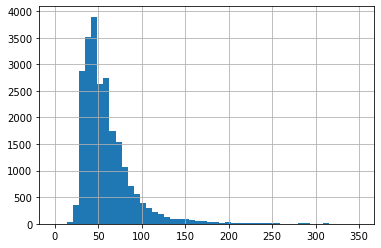

In [40]:
df['total_area'].hist(range = (0,350),bins=50);

Из графика видно, что основная масса объявлений с квартирами около 50 м2

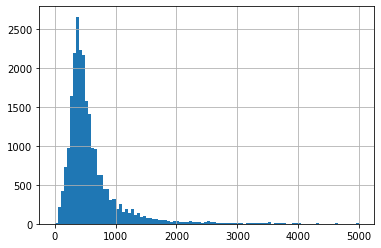

In [41]:
(df['last_price'] / 10000).hist(range = (0,5000), bins = 100);

Из графика видно, что в среднем квартиры продаются за 5кк, но есть и выбросы в районе 0

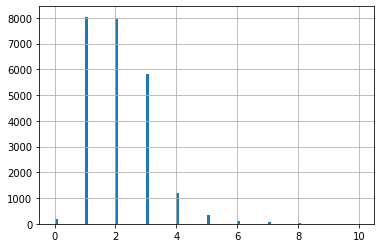

In [42]:
df['rooms'].hist(range = (0,10), bins = 100);

Из графика видно, что в основном продают 1-3 комнатные квартиры, но есть и выбросы в районе 0

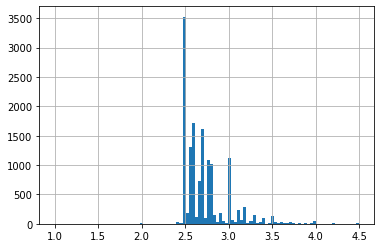

In [43]:
df['ceiling_height'].hist(range = (1,4.5), bins = 100);

Из графика видно, что в основном высота потолка 2-4 метра, но есть и выбросы в районе более 4 метров

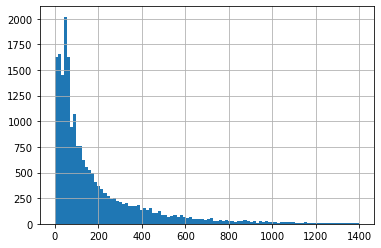

In [44]:
df['days_exposition'].hist(range = (0,1400), bins = 100);

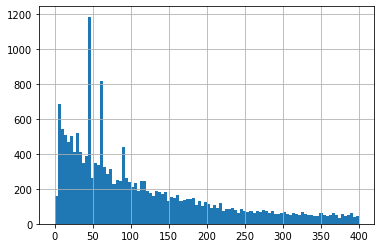

In [45]:
df['days_exposition'].hist(range = (0,400), bins = 100);

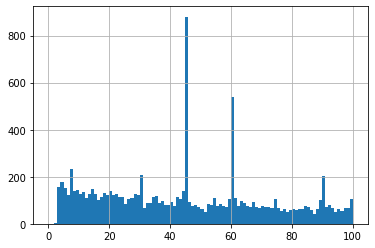

In [46]:
df['days_exposition'].hist(range = (0,100), bins = 100);

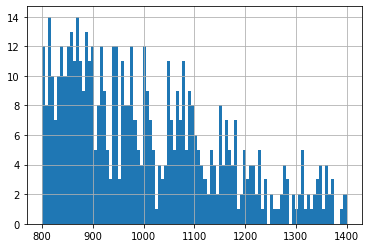

In [47]:
df['days_exposition'].hist(range = (800,1400), bins = 100);

In [48]:
print('Среднее время продажи квартиры:', df['days_exposition'].mean())
print('Медианное время продажи квартиры:', df['days_exposition'].median())

Среднее время продажи квартиры: 180.88864
Медианное время продажи квартиры: 95.0


Продажа занимает в среднем 180 дней, долгая продажа, если квартира продаётся дольше 180 дней, быстрая продажа, если меньше 95 дней

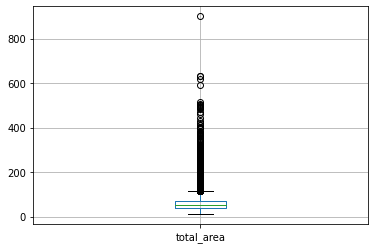

In [49]:
df.boxplot(column='total_area')
plt.show()

Выбросы в столбце 'total_area' больше 550м2

In [50]:
#Количество выбросов
print(df.loc[df['total_area'] > 550]['total_area'].count() + 
df.loc[df['total_area'] < 20]['total_area'].count())

32


In [51]:
df_copy = df.copy()

In [52]:
df = df.query('20 < total_area < 550')

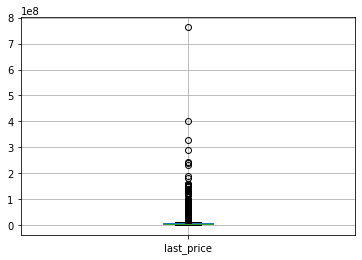

In [53]:
df.boxplot(column='last_price')
plt.show()

Выбросы в столбце 'last_price' больше 45000000

In [54]:
#Количество выбросов
print(df.loc[df['last_price'] > 45000000]['last_price'].count() + df.loc[df['last_price'] < 500000]['last_price'].count())

170


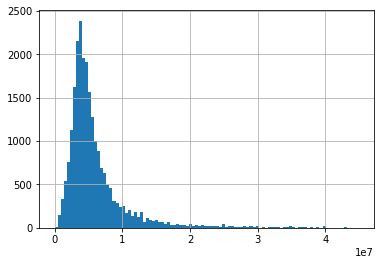

In [55]:
df['last_price'].hist(range = (0,45000000), bins = 100);

In [56]:
df = df.query('500000 < last_price < 45000000')

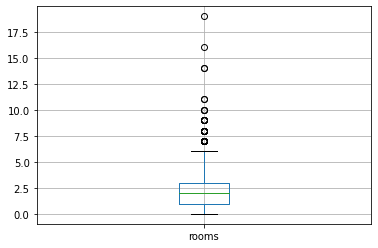

In [57]:
df.boxplot(column='rooms')
plt.show()

In [58]:
#Количество выбросов
print(df.loc[df['rooms'] > 6]['rooms'].count())

68


In [59]:
df = df.query('rooms <= 6')

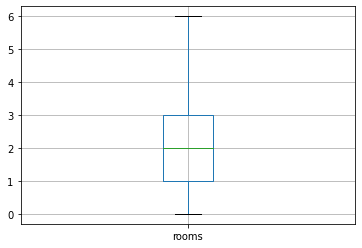

In [60]:
df.boxplot(column='rooms')
plt.show()

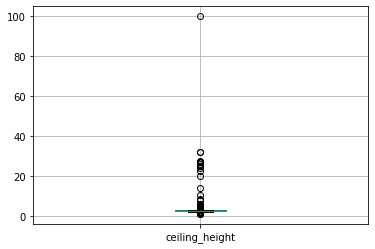

In [61]:
df.boxplot(column='ceiling_height')
plt.show()

In [62]:
print(df.loc[df['ceiling_height'] > 20]['ceiling_height'].count())

22


In [63]:
print(df.loc[df['ceiling_height'] > 4.5]['ceiling_height'].count() + df.loc[df['ceiling_height'] < 2]['ceiling_height'].count())

38


In [64]:
# Заполним высоту потолков средними значениями
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [65]:
df = df.query('2<ceiling_height<4.5')

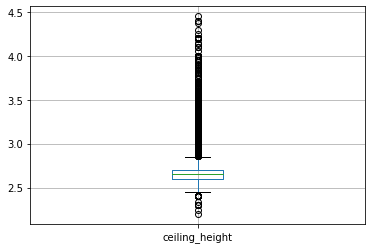

In [66]:
df.boxplot(column='ceiling_height')
plt.show()

In [67]:
print(len(df)/len(df_copy))

0.9856112072239335


In [68]:
print('Зависимость цены от площади:', df['total_area'].corr(df['last_price']))

Зависимость цены от площади: 0.7823138804698959


Чем больше площадь, тем выше цена

In [69]:
print('Зависимость цены от количества комнат:', df['rooms'].corr(df['last_price']))

Зависимость цены от количества комнат: 0.4900374733878503


Зависимость цены от количества комнат меньше, чем от площади, но чем больше комнат, тем выше цена

In [70]:
print('Зависимость цены от расстояния до центра города:', df['citycenters_nearest'].corr(df['last_price']))

Зависимость цены от расстояния до центра города: -0.3340201376936738


Зависимость небольшая, но она есть. Чем меньше расстояние до центра, тем выше цена

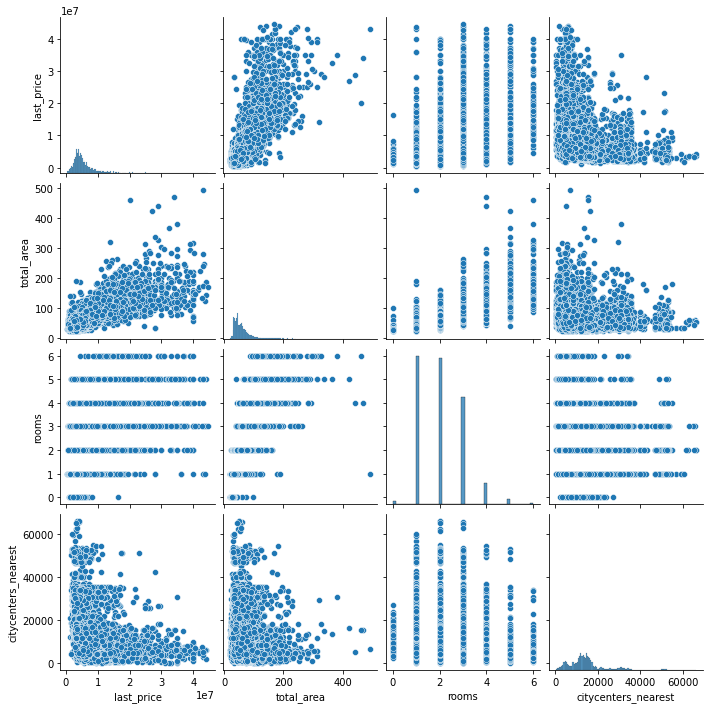

In [71]:
seaborn.pairplot(df[['last_price', 'total_area', 'rooms', 'citycenters_nearest']]);

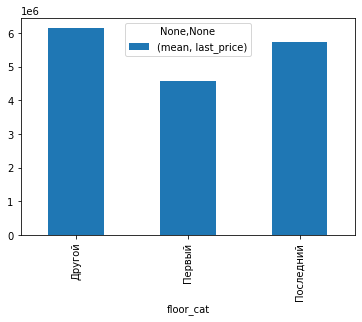

In [72]:
df.pivot_table(index = "floor_cat", values = "last_price", aggfunc = ['mean']).plot(kind='bar');

Средняя цена первого этажа ниже остальных этажей, средняя цена последнего этажа ниже, чем у других. Люди предпочитают не первый и не последний этаж

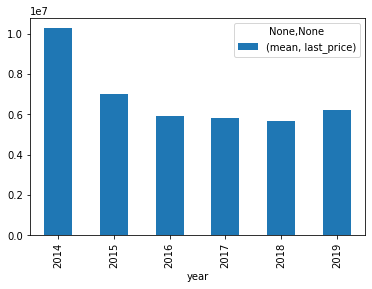

In [73]:
df.pivot_table(index = "year", values = "last_price", aggfunc = ['mean']).plot(kind = 'bar');

с 2015 года цены держатся примерно на одном уровне. Скачок в 2014 году, скорее всего, был вызван ростом курса доллара.

<AxesSubplot:xlabel='month'>

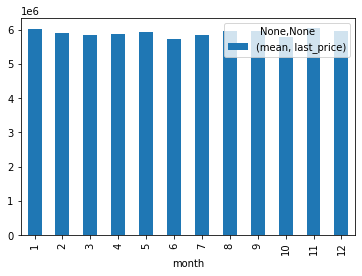

In [74]:
df.pivot_table(index = "month", values = "last_price", aggfunc = ['mean']).plot(kind = 'bar')

Летом самые низкие цены в июне и марте

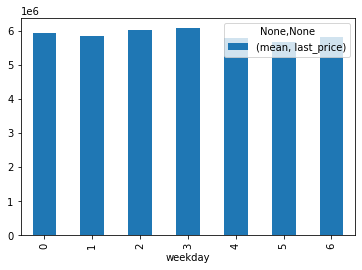

In [75]:
df.pivot_table(index = "weekday", values = "last_price", aggfunc = ['mean']).plot(kind = 'bar');

Зависимости цены от дня недели нет

In [76]:
# Выбор 10 населённых пунктов с наибольшим числом объявлений.
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15436
посёлок Мурино         519
посёлок Шушары         439
Всеволожск             396
Пушкин                 367
Колпино                337
посёлок Парголово      326
Гатчина                306
деревня Кудрово        298
Выборг                 234
Name: locality_name, dtype: int64

In [77]:
# Список и срез 10 населённых пунктов с наибольшим числом объявлений.
list =  df['locality_name'].value_counts().head(10).index
top_ten = df.query('locality_name in @list')

In [78]:
# Средняя цена квадратного метра для каждого населённого пункта.
top_ten.pivot_table(index = 'locality_name', values = 'metr_price', aggfunc = 'mean').sort_values(by = 'metr_price')

,metr_price
locality_name,
Выборг,58190.128906
Всеволожск,68747.648438
Гатчина,68757.679688
Колпино,75333.296875
посёлок Шушары,78655.593750
посёлок Мурино,85721.820312
посёлок Парголово,90332.265625
деревня Кудрово,92481.851562
Пушкин,103056.031250


In [79]:
# Нахождение средней цены квартиры в ТОП-10 локаций
top_ten.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'mean').sort_values(by = 'last_price')

,last_price
locality_name,
Выборг,3246508.50
Гатчина,3487971.75
посёлок Мурино,3676801.00
Всеволожск,3799492.25
Колпино,3866288.50
посёлок Шушары,4114022.75
деревня Кудрово,4242326.00
посёлок Парголово,4477609.00
Пушкин,6383853.50


Самая высокая стоимость жилья в Санкт-Петербурге и самая низкая в Выборге

In [80]:
# Выделяем квартиры в Санкт-Петербурге
spb_flat = df.query('locality_name == "Санкт-Петербург"')
spb_flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_cat,live_ratio,kitchen_ratio
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,NaN,120370.367188,3,3,2019,Другой,0.472222,0.231481
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,NaN,...,2.0,574.0,558.0,92785.710938,3,8,2015,Другой,0.612500,0.148214
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,0.0,NaN,NaN,110544.695312,3,4,2019,Другой,NaN,0.263966
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,NaN,...,0.0,NaN,289.0,88524.593750,6,2,2017,Другой,0.714754,0.106557


In [81]:
# Количество объявлений без расстояния до центра в СПБ
spb_flat['citycenters_nearest'].isna().sum()

58

In [82]:
# Перевод метров в километры
spb_flat['centr_ratio'] = spb_flat['citycenters_nearest']/1000

In [83]:
spb_flat['centr_ratio'] = spb_flat['centr_ratio'].fillna(spb_flat['centr_ratio'].median())

In [84]:
spb_flat['centr_ratio'] = spb_flat['centr_ratio'].astype('int', errors = 'ignore')

In [85]:
spb_flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_cat,live_ratio,kitchen_ratio,centr_ratio
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,755.0,NaN,120370.367188,3,3,2019,Другой,0.472222,0.231481,16
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,NaN,...,574.0,558.0,92785.710938,3,8,2015,Другой,0.612500,0.148214,13
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,8
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,NaN,NaN,110544.695312,3,4,2019,Другой,NaN,0.263966,11
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,NaN,...,NaN,289.0,88524.593750,6,2,2017,Другой,0.714754,0.106557,15


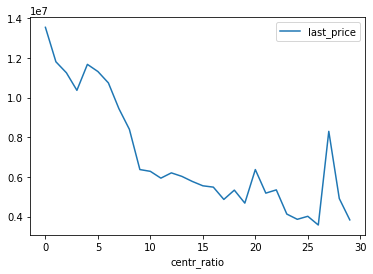

In [86]:
# средняя цена для каждого километра
spb_flat.pivot_table(index = 'centr_ratio', values = 'last_price', aggfunc = 'mean').plot(y = 'last_price');

Центральая зона - 7 км

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Согласна с определением центра 👍

In [87]:
spb_center = spb_flat.query('centr_ratio < 7')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_cat,live_ratio,kitchen_ratio,centr_ratio
24,8,6500000.0,97.199997,2015-10-31,2,2.65,3.0,46.5,1,NaN,...,124.0,265.0,66872.429688,5,10,2015,Первый,0.478395,0.201646,2
35,6,15500000.0,149.000000,2017-06-26,5,2.65,5.0,104.0,4,NaN,...,779.0,644.0,104026.843750,0,6,2017,Другой,0.697987,0.114094,3
52,20,11795000.0,136.000000,2017-09-22,6,3.00,2.0,94.0,2,NaN,...,NaN,NaN,86727.937500,4,9,2017,Последний,0.691176,0.080882,6
61,18,7990000.0,74.000000,2017-08-24,2,2.65,4.0,43.0,4,NaN,...,NaN,609.0,107972.976562,3,8,2017,Последний,0.581081,0.270270,4
63,2,20000000.0,118.000000,2018-09-11,3,3.00,9.0,68.0,7,NaN,...,779.0,37.0,169491.531250,1,9,2018,Другой,0.576271,0.135593,4


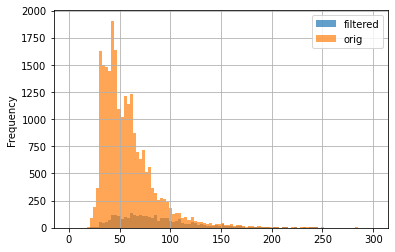

In [88]:
ax = spb_center.plot(kind='hist',
    y='total_area',

    range=(0, 300),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='filtered',
     )
df.plot(
    kind='hist',
    y='total_area',
    range=(0, 300),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='orig',
    ax = ax,
    grid=True,
    legend=True);

Площадь продаваемых квартир в центре больше, чем по всем объявлениям (50-100 против 25-60)

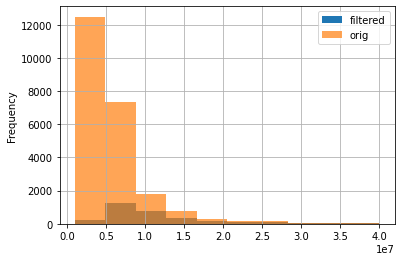

In [89]:
prio = spb_center.plot(kind='hist',
    y='last_price',

    range=(1000000,40000000),
    bins=10,
    label='filtered',
     )
df.plot(
    kind='hist',
    y='last_price',
   
    range=(1000000,40000000),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='orig',
    ax = prio,
    grid=True,
    legend=True);


Квартиры в центре дороже, их продают в среднем от 5 до 12 млн, а по общей базе в среднем до 5 млн.

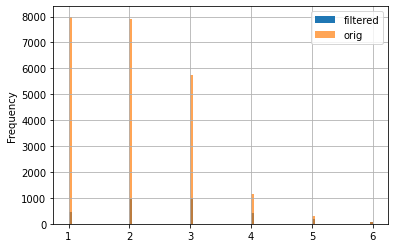

In [90]:
priu = spb_center.plot(kind='hist',
    y='rooms',

    range=(1,6),
    bins=100,
    label='filtered',
     )
df.plot(
    kind='hist',
    y='rooms',
   
    range=(1,6),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='orig',
    ax = priu,
    grid=True,
    legend=True);


В центре, в основном, продаются двух-трёхкомнатные квартиры, а по общей базе - 1-2 комнатные.

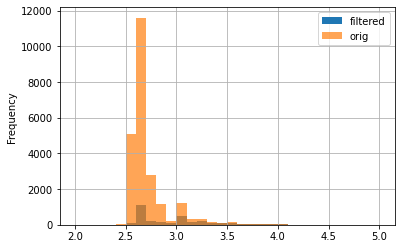

In [91]:
prius = spb_center.plot(kind='hist',
    y='ceiling_height',

    range=(2,5),
    bins=30,
    label='filtered',
     )
df.plot(
    kind='hist',
    y='ceiling_height',
   
    range=(2,5),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='orig',
    ax = prius,
    grid=True,
    legend=True);

В центре, в основном, высота потолков 2.7, 3.1. По всей базе 2.5-2.7.

In [92]:
print('Зависимость цены от числа комнат:', spb_center['last_price'].corr(spb_center['rooms']))
print('Зависимость цены от удаленности от центра:', spb_center['last_price'].corr(spb_center['citycenters_nearest']))
print('Зависимость цены от высоты потолков:', spb_center['last_price'].corr(spb_center['ceiling_height']))
print('Зависимость цены от площади:', spb_center['last_price'].corr(spb_center['total_area']))

Зависимость цены от числа комнат: 0.40623889523806256
Зависимость цены от удаленности от центра: -0.020773150048962505
Зависимость цены от высоты потолков: 0.1616505578825261
Зависимость цены от площади: 0.7054956389545132


Цена квартиры в центре зависит от числа комнат, площади. Чем больше площадь, число комнат, тем выше цена квартиры. Удаленность от центра и высота потолков почти не влияет на цену.

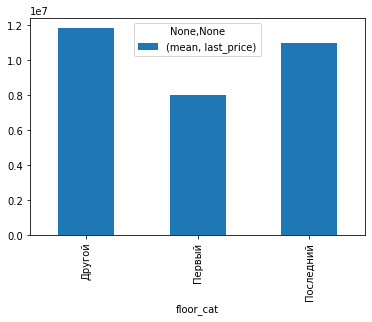

In [93]:
# Зависимость цены от этажа
spb_center.pivot_table(index = "floor_cat", values = "last_price", aggfunc = ['mean']).plot(kind = 'bar');

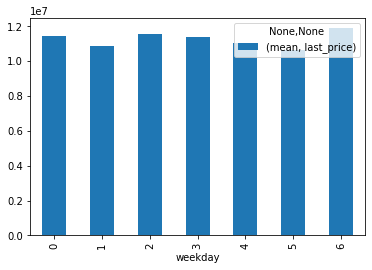

In [94]:
# Зависимость цены от даты публикации
spb_center.pivot_table(index = "weekday", values = "last_price", aggfunc = ['mean']).plot(kind='bar');

Самые высокие цены в воскресенье, самые низкие во вторник

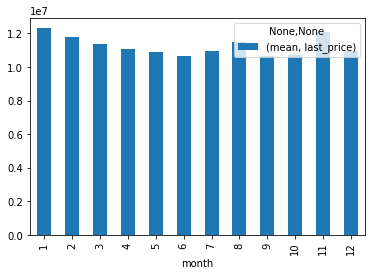

In [95]:
# Зависимость цены от даты публикации
spb_center.pivot_table(index = "month", values = "last_price", aggfunc = ['mean']).plot(kind='bar');

Цена падает с января по июнь и растет с июля по ноябрь

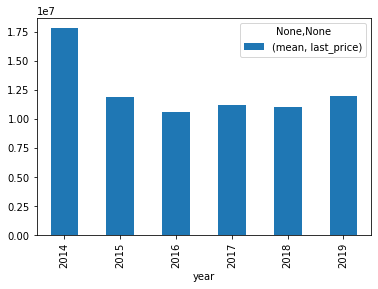

In [96]:
# Зависимость цены от даты публикации
spb_center.pivot_table(index = "year", values = "last_price", aggfunc = ['mean']).plot(kind='bar');

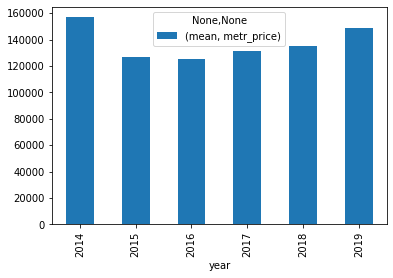

In [97]:
# Зависимость цены квадратного метра от даты публикации
spb_center.pivot_table(index = "year", values = "metr_price", aggfunc = ['mean']).plot(kind='bar');

с 2015 года цена на квадратный метр растёт ежегодно

In [98]:
#Зависимость цены от высоты потолков для всей базы
df['last_price'].corr(df['ceiling_height'])

0.41617953732995017

Площадь продаваемых квартир в центре больше, чем по всем объявлениям (50-100 против 25-60), квартиры в центре дороже, их продают в среднем от 5 до 10 млн, а по общей базе в среднем до 5 млн. В центре, в основном, продаются двух-трёхкомнатные квартиры, а по общей базе - 1-2 комнатные. Высота потолков квартир в центре почти не влияет на стоимость квартиры, в то время как по всей базе высота потолков влияет на стоимость квартиры. Самые дешёвые квартиры на первом этаже, но на последнем дешевле, чем на других. Дата размещения не оказывает существенного влияния на цену. Удалённость от центра в центральном районе не влияет на цену. Цена квартиры зависит от: площади, этажа, числа комнат, удалённости от центра, высоты потолков.

## Общий вывод

Площадь продаваемых квартир в центре больше, чем по всем объявлениям (50-100 против 25-60), квартиры в центре дороже, их продают в среднем от 5 до 10 млн, а по общей базе в среднем до 5 млн. В центре, в основном, продаются двух-трёхкомнатные квартиры, а по общей базе - 1-2 комнатные. Высота потолков квартир в центре почти не влияет на стоимость квартиры, в то время как по всей базе высота потолков влияет на стоимость квартиры. Самые дешёвые квартиры на первом этаже, но на последнем дешевле, чем на других. Дата размещения не оказывает существенного влияния на цену. Удалённость от центра в центральном районе не влияет на цену. Цена квартиры зависит от: площади, этажа, числа комнат, удалённости от центра, высоты потолков.